# Yulu - Hypothesis Testing

#### About Yulu:
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

#### Business Problem:
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [3]:
df=pd.read_csv("bike_sharing.csv")

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather: 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain - Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [5]:
print("No.of Rows: \t",df.shape[0])
print("No.of Columns: \t",df.shape[1])

No.of Rows: 	 10886
No.of Columns: 	 12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- There are no Null values in any of the features

In [8]:
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


- There are no duplicate rows the dataset as well.

In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
# Changing the dataype of the datetime feature.
df['datetime']=pd.to_datetime(df['datetime'])

In [11]:
# Changing the datatypes of certain features to 'category'
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [12]:
print('The total time period of the data is',df['datetime'].max()- df['datetime'].min())

The total time period of the data is 718 days 23:00:00


In [13]:
df.set_index('datetime',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 723.5 KB


## EDA

In [15]:
df['season'].value_counts(normalize=True)*100

season
4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: proportion, dtype: float64

In [16]:
df['holiday'].value_counts(normalize=True)*100

holiday
0    97.14312
1     2.85688
Name: proportion, dtype: float64

In [17]:
df['workingday'].value_counts(normalize=True)*100

workingday
1    68.087452
0    31.912548
Name: proportion, dtype: float64

In [18]:
df['weather'].value_counts(normalize=True)*100

weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: proportion, dtype: float64

In [19]:
print(f"Percentage of bookings by registered users: {(df['registered'].sum() / df['count'].sum()) * 100:.2f}%")

Percentage of bookings by registered users: 81.20%


In [20]:
print(f"Percentage of bookings by casual users: {(df['casual'].sum() / df['count'].sum()) * 100:.2f}%")

Percentage of bookings by casual users: 18.80%


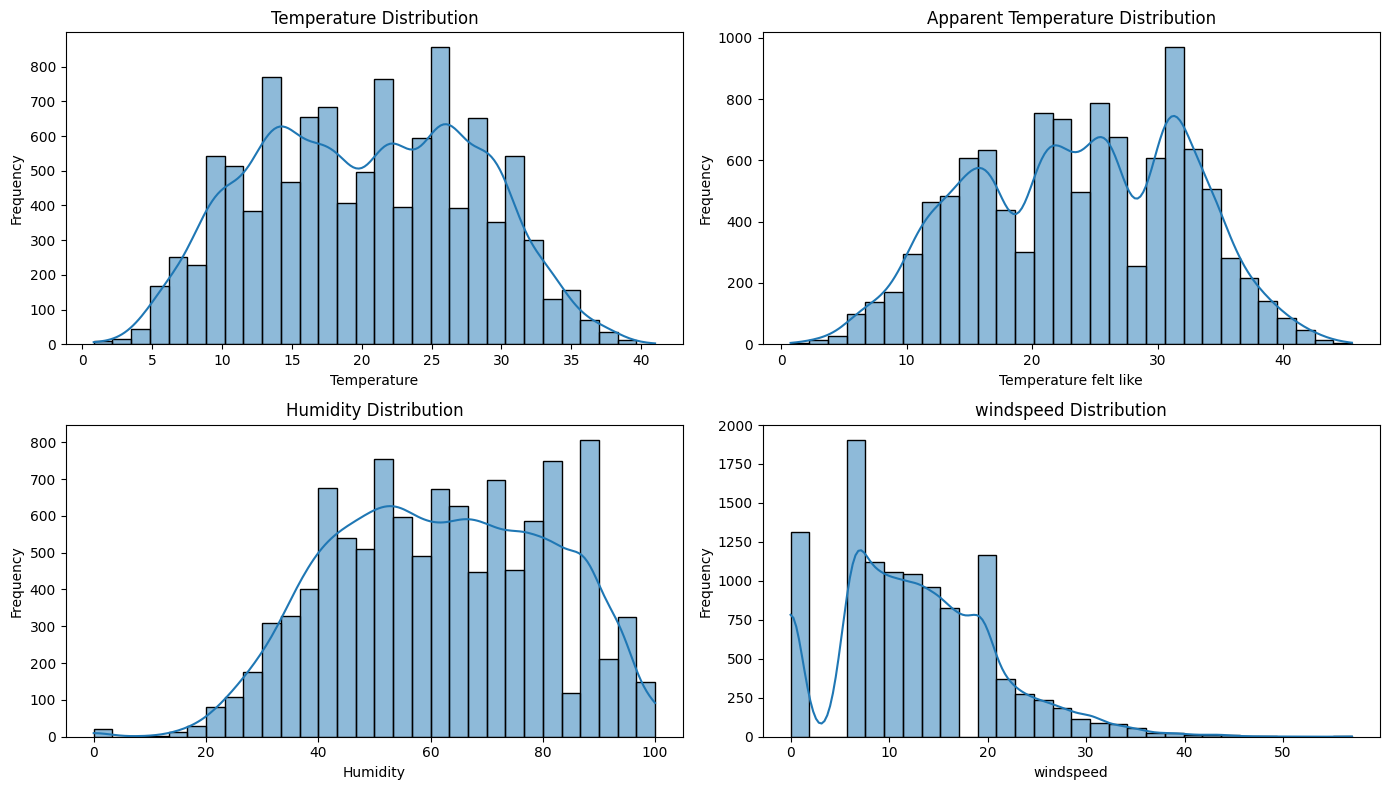

In [21]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.histplot(df['temp'], bins=30, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.subplot(2,2,2)
sns.histplot(df['atemp'], bins=30, kde=True)
plt.xlabel('Temperature felt like')
plt.ylabel('Frequency')
plt.title('Apparent Temperature Distribution')

plt.subplot(2,2,3)
sns.histplot(df['humidity'], bins=30, kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')

plt.subplot(2,2,4)
sns.histplot(df['windspeed'], bins=30, kde=True)
plt.xlabel('windspeed')
plt.ylabel('Frequency')
plt.title('windspeed Distribution')

plt.tight_layout()
plt.show()

- Actual temperature and temperature felt seems to be very similar.

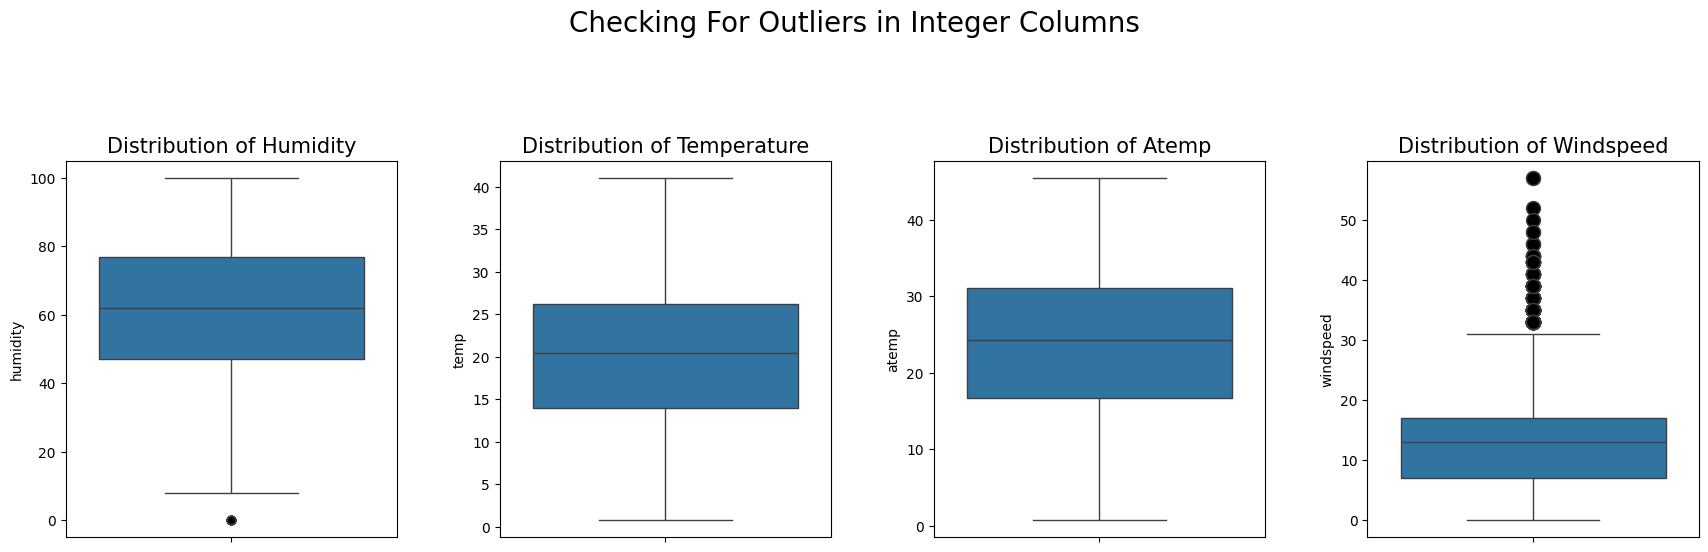

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

sns.boxplot(y=df['humidity'], ax=axes[0],flierprops=dict(markerfacecolor='black', marker='o'))
sns.boxplot(y=df['temp'], ax=axes[1],flierprops=dict(markerfacecolor='black', marker='o'))
sns.boxplot(y=df['atemp'],ax=axes[2],flierprops=dict(markerfacecolor='black', marker='o'))
sns.boxplot(y=df['windspeed'], ax=axes[3],fliersize=10,flierprops=dict(markerfacecolor='black', marker='o'))

plt.suptitle("Checking For Outliers in Integer Columns",fontsize = 20)
axes[0].set_title("Distribution of Humidity",fontsize = 15)
axes[1].set_title("Distribution of Temperature",fontsize = 15)
axes[2].set_title("Distribution of Atemp",fontsize = 15)
axes[3].set_title("Distribution of Windspeed",fontsize = 15)

plt.tight_layout(pad=4)
plt.show()

- There are some outliers in columns Humidity, Windspeed but these outliers wont harm any future insights so we are going to continue, if required we will remove them later.

#### Trend of average monthly bookings (Casual & Registered):

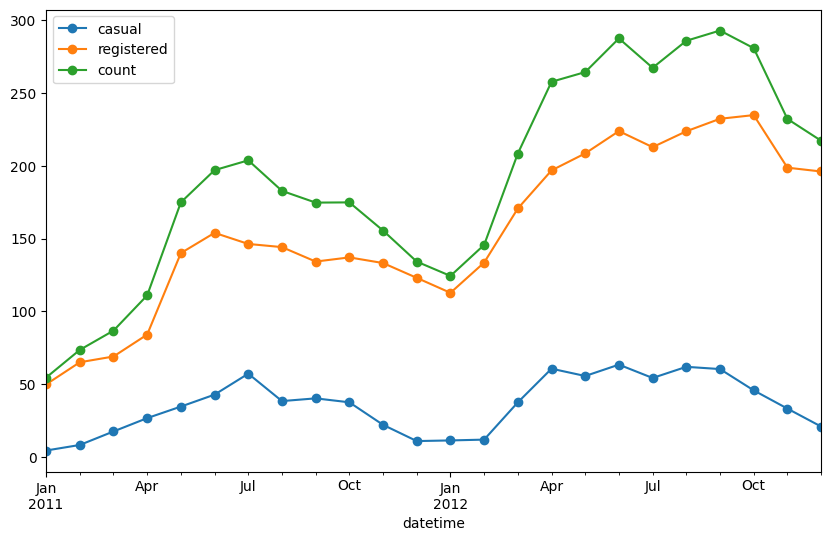

In [23]:
plt.figure(figsize = (10, 6))
df.resample('ME')['casual'].mean().plot(kind='line',legend='casual',marker='o')
df.resample('ME')['registered'].mean().plot(kind='line',legend='registered',marker='o')
df.resample('ME')['count'].mean().plot(kind='line',legend='count',marker='o')

plt.show()

#### Monthly trend of total bookings (Casual & Registered):

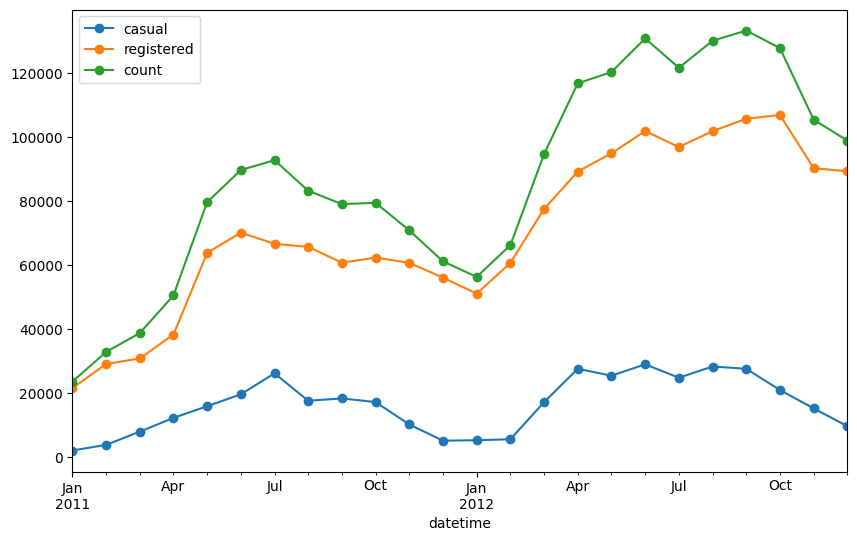

In [24]:
plt.figure(figsize = (10, 6))
df.resample('ME')['casual'].sum().plot(kind='line',legend='casual',marker='o')
df.resample('ME')['registered'].sum().plot(kind='line',legend='registered',marker='o')
df.resample('ME')['count'].sum().plot(kind='line',legend='count',marker='o')

plt.show()

There is a clear indication that there is a substantial increase in monthly total bookings from 2011 to 2012.

In [25]:
df1=df.resample('Y')['count'].mean().to_frame().reset_index()
df1['prev_count'] = df1['count'].shift(1)
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


- The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

In [26]:
df.reset_index(inplace=True)

#### Trend of average monthly bookings:

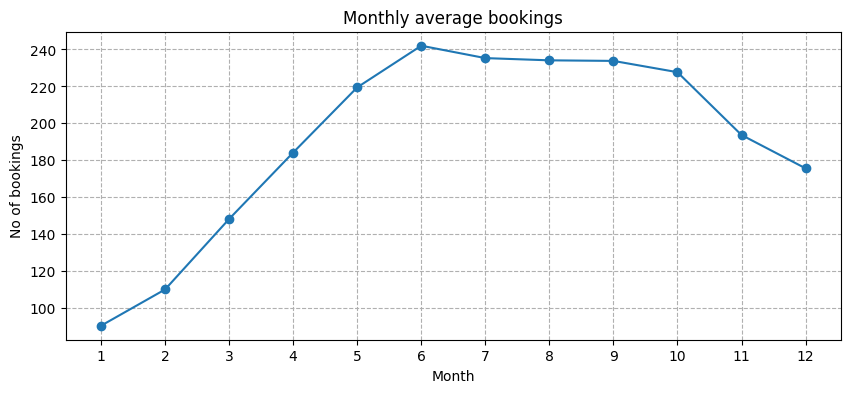

In [27]:
plt.figure(figsize = (10, 4))
df.groupby(df['datetime'].dt.month)['count'].mean().plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('No of bookings')
plt.title('Monthly average bookings')
plt.xticks(np.arange(1,13,1))
plt.grid(axis = 'both', linestyle = '--')
plt.show()

- Bookings rise, reaching their peak in June, then slightly decline until September, before steeply dipping until December.

#### Hourly average bookings trend

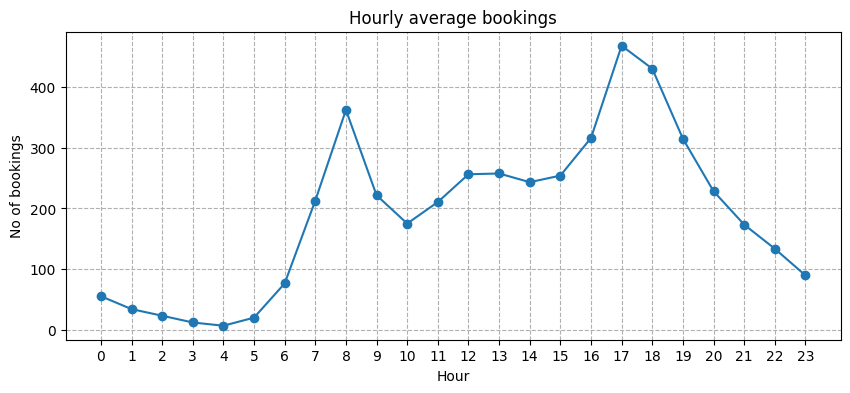

In [28]:
plt.figure(figsize = (10, 4))
df.groupby(df['datetime'].dt.hour)['count'].mean().plot(kind='line',marker='o')
plt.xlabel('Hour')
plt.ylabel('No of bookings')
plt.title('Hourly average bookings')
plt.xticks(np.arange(0,24,1))
plt.grid(axis = 'both', linestyle = '--')
plt.show()

- Bookings are very low in the early hours, steeply increase from 6 to 8 AM, then decrease slightly and stabilize. They start increasing again from 3 PM, reach their peak at 5 PM, and rapidly decrease afterward.
- The increase in bookings might be due to people travelling to and from colleges, offices etc.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


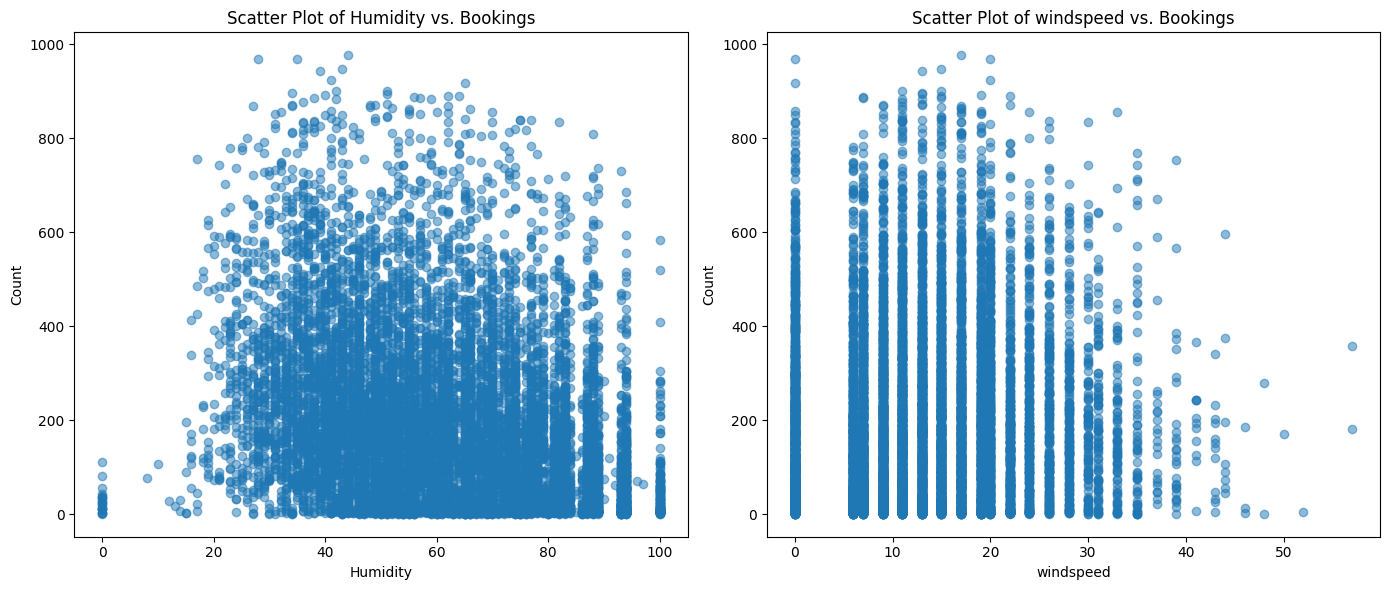

In [30]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.scatter(df['humidity'], df['count'], alpha=0.5)
plt.title('Scatter Plot of Humidity vs. Bookings')
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.scatter(df['windspeed'], df['count'], alpha=0.5)
plt.title('Scatter Plot of windspeed vs. Bookings')
plt.xlabel('windspeed')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [31]:
df.groupby('windspeed')['count'].sum().head(5)

windspeed
0.0000     211526
6.0032     128938
7.0015     175627
8.9981     196723
11.0014    213791
Name: count, dtype: int64

- From the above scatter plot it can observed that days with lower windspeeds got higher number of bookings.

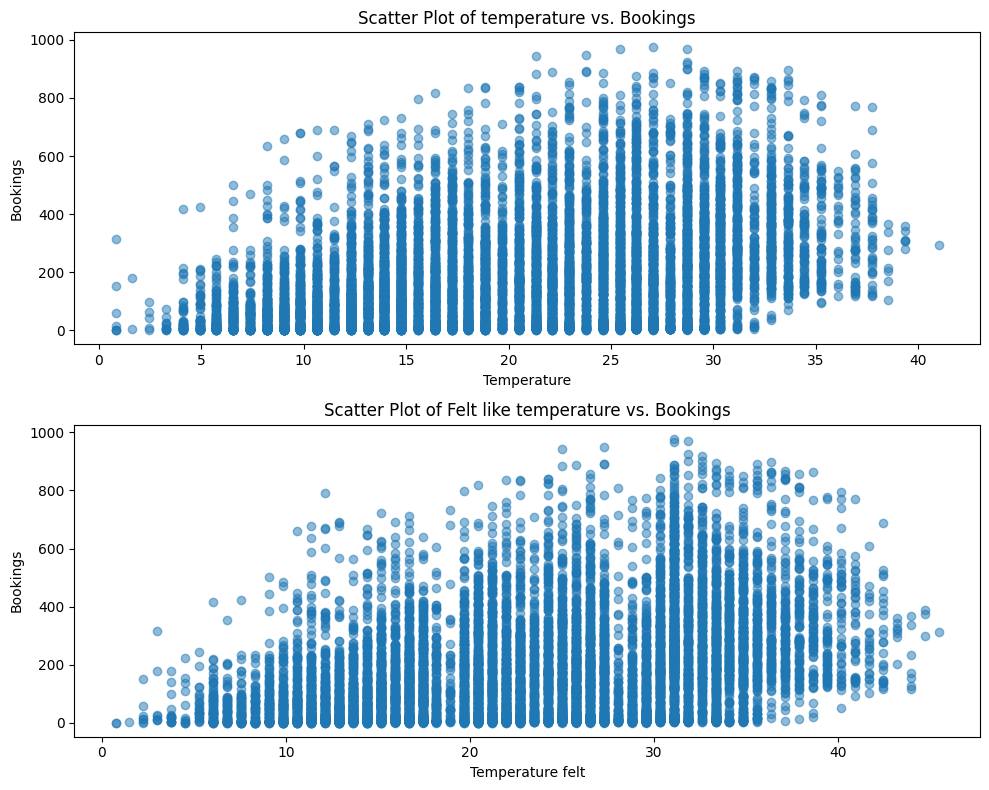

In [32]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.scatter(df['temp'], df['count'], alpha=0.5)
plt.title('Scatter Plot of temperature vs. Bookings')
plt.xlabel('Temperature')
plt.ylabel('Bookings')

plt.subplot(2,1,2)
plt.scatter(df['atemp'], df['count'], alpha=0.5)
plt.title('Scatter Plot of Felt like temperature vs. Bookings')
plt.xlabel('Temperature felt')
plt.ylabel('Bookings')

plt.tight_layout()
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


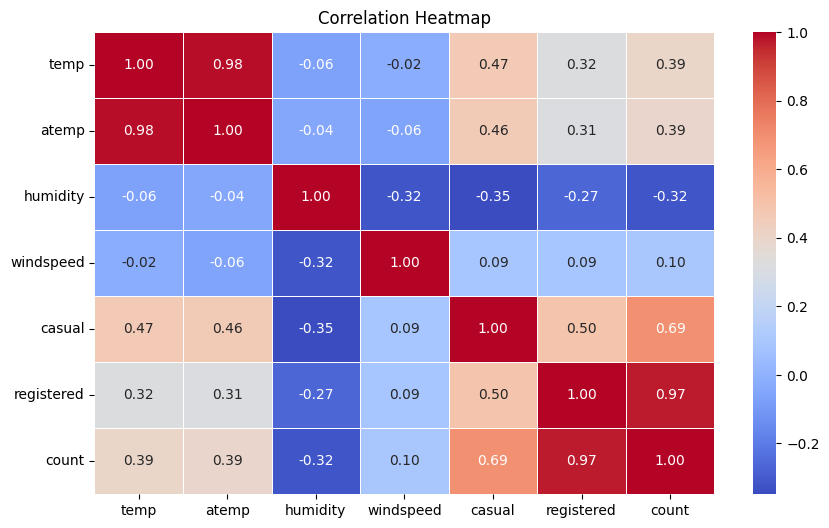

In [34]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Computing the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')

plt.title('Correlation Heatmap')
plt.show()

- Very High Correlation (> 0.9) exists between columns atemp, temp and count, registered.
- Low negative correlation (0.35) exists between humidity and windspeed.
- Low Positive correlation (0.39) exists between count and temp, atemp columns.

## Feature: Working day & Bookings

In [35]:
df.groupby('workingday')['count'].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [36]:
df.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

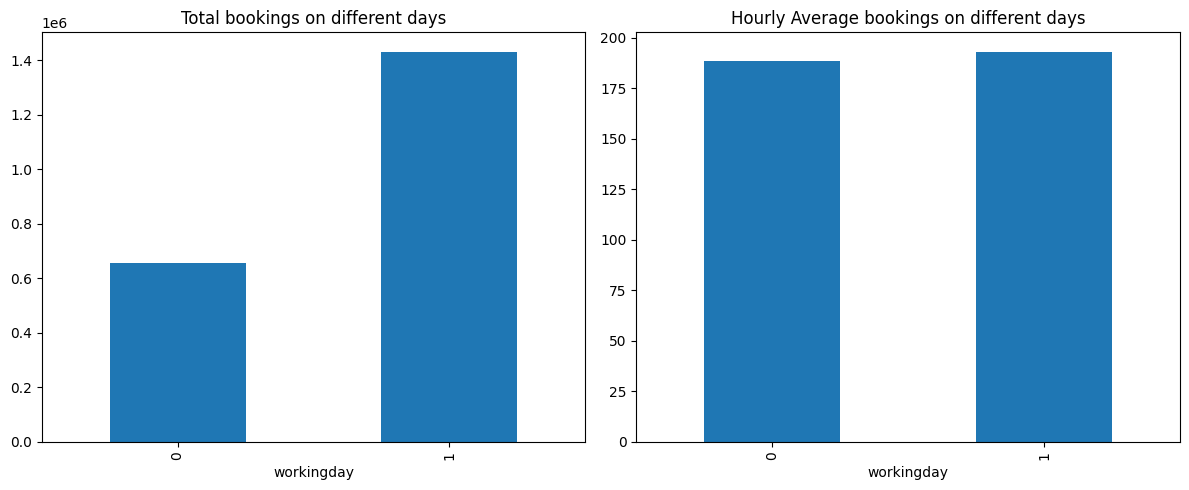

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df.groupby('workingday')['count'].sum().plot(kind='bar')
plt.title('Total bookings on different days')

plt.subplot(1,2,2)
df.groupby('workingday')['count'].mean().plot(kind='bar')
plt.title('Hourly Average bookings on different days')

plt.tight_layout()
plt.show()

- The average bookings seems to be similar during working days and weekends. Let's find if it is actually true using statistical methods.

### Is the number of cycles rented is similar or different on working and non working days?

- 'workingday' is a categorical variable and 'count' is a numerical variable.

- Null Hypothesis ( H0 ) - Mean of no. of cycles rented is same for working and non-working days.
- Alternate Hypothesis ( HA ) - Mean of no. of cycles rented is different for working and non-working days.
- Significance level (Alpha) - 0.05
- Test - Student’s t-test

In [38]:
working_day=df[df['workingday']==1]['count']
not_working_day= df[df['workingday']==0]['count']

Assumptions for a T test are:
- Observations in each sample are independent.
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

#### Checking for Normality using distribution plots.

In [39]:
import statsmodels.api as sm

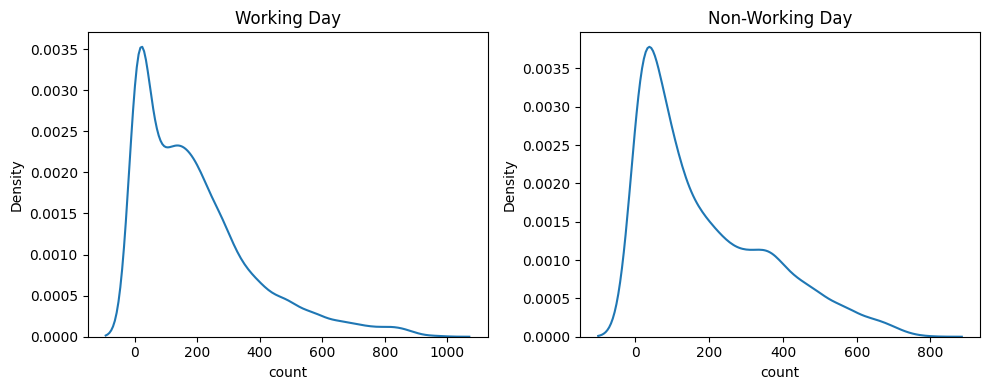

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(working_day)
plt.title('Working Day')

plt.subplot(1,2,2)
sns.kdeplot(not_working_day)
plt.title('Non-Working Day')

plt.tight_layout()
plt.show()

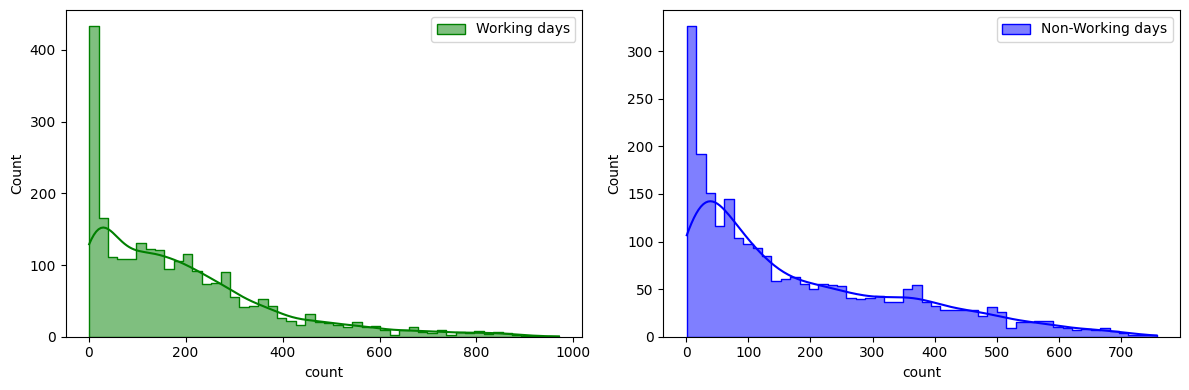

In [41]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.histplot(working_day.sample(2500) , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'Working days')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(not_working_day.sample(2500) , bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'Non-Working days')
plt.legend()

plt.tight_layout()
plt.show()

- The above KDE plot and histplot shows that data is not a Normally distributed data. Let's confirm the same a Q-Q plot.

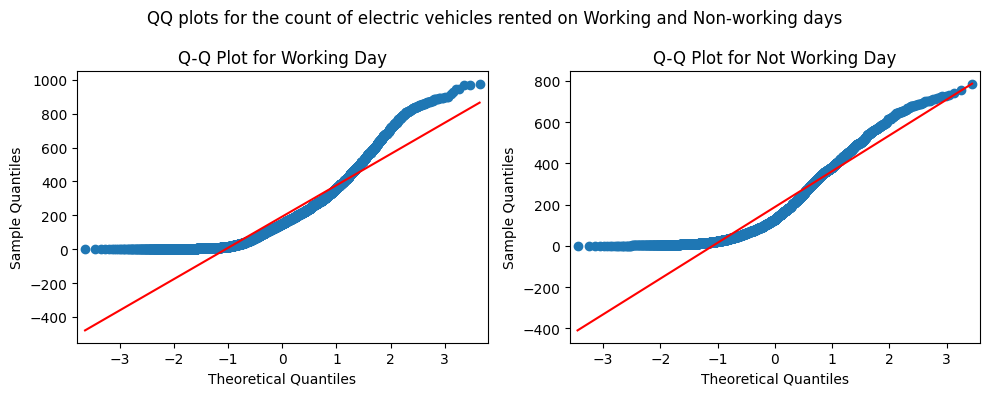

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("QQ plots for the count of electric vehicles rented on Working and Non-working days")

# Q-Q plot for working_day
sm.qqplot(working_day, line='s', ax=ax[0])
ax[0].set_title('Q-Q Plot for Working Day')

# Q-Q plot for not_working_day
sm.qqplot(not_working_day, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot for Not Working Day')

plt.tight_layout()
plt.show()

- QQ plot evidently proves that the data is not normally distributed, the quantiles on both axis are not aligned.

##### Let's conduct a Shapiro-Wilk Test to check for normality

In [43]:
from scipy.stats import shapiro

In [44]:
stat, p = shapiro(working_day)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.870, p=0.000
Probably not Gaussian


In [45]:
stat, p = shapiro(not_working_day)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.885, p=0.000
Probably not Gaussian


- So, the above Shapiro tests statistically proved that both working day and non-working day booking data is not normally distributed.

#### Checking if both the datasets have same variance using Levene's test

In [46]:
import scipy.stats as stats

In [47]:
# Performing Levene's test
stat, p_value = stats.levene(working_day, not_working_day)

print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Levene's test statistic: 0.004972848886504472
p-value: 0.9437823280916695
The variances are not significantly different.


- With the help of Levene's test it is statistically proved that both has similar variances.

- From the above tests it is found that both the working and non-working day data is not normally distributed but has similar variances.
- We cannot perform T-test as the criteria is not met.
- But, we are instructed to go ahead with the test(just this business case) even if the assumptions are met.

#### 2-Sampled T-test

In [48]:
from scipy.stats import ttest_ind

In [49]:
# Performing the two-sample t-test
t_stat, p_value = stats.ttest_ind(working_day, not_working_day)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The means are significantly different.")
else:
    print("The means are not significantly different.")

t-statistic: 1.2096277376026694
p-value: 0.22644804226361348
The means are not significantly different.


- The above t-test statistically proves that mean of bookings on both working and non-working days is similar.

## Feature - Holiday & Bookings

In [50]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [51]:
df['holiday'].value_counts(normalize=True)*100

holiday
0    97.14312
1     2.85688
Name: proportion, dtype: float64

In [52]:
df.groupby('holiday')['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

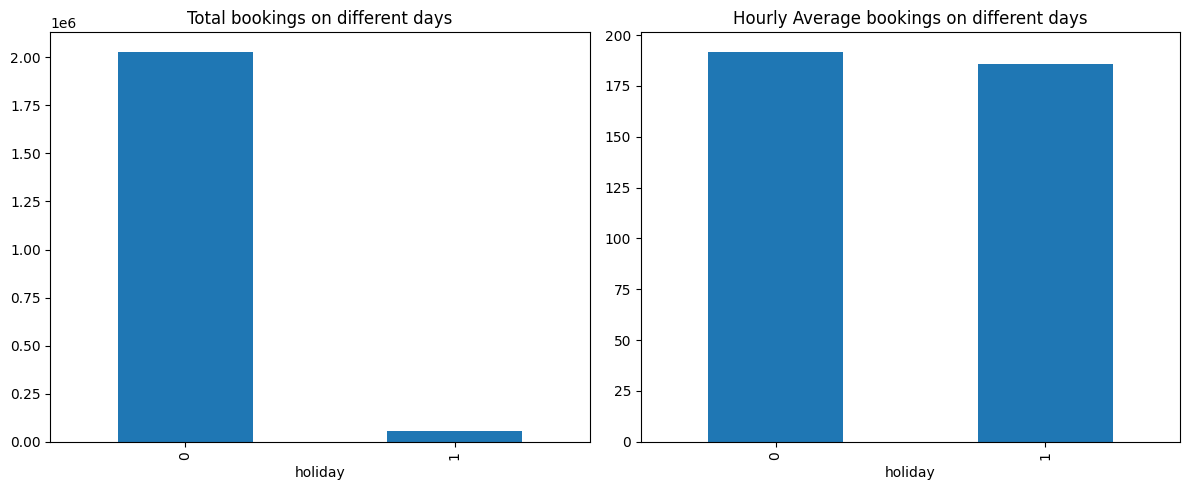

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df.groupby('holiday')['count'].sum().plot(kind='bar')
plt.title('Total bookings on different days')

plt.subplot(1,2,2)
df.groupby('holiday')['count'].mean().plot(kind='bar')
plt.title('Hourly Average bookings on different days')

plt.tight_layout()
plt.show()

- The average hourly bookings on holidays and normal days seems to be close to each other from the above plots. Let's check the same using a statistical method.

#### Is the number of cycles rented is similar or different on holidays and normal days?

- 'holiday' is a categorical variable and 'count' is a numerical variable.
- Null Hypothesis ( H0 ) - Mean of no. of cycles rented is same for holidays and non-holidays.
- Alternate Hypothesis ( HA ) - Mean of no. of cycles rented is different for holidays and non-holidays.
- Significance level (Alpha) - 0.05
- Test - Student’s t-test

In [54]:
holidays=df[df['holiday']==1]['count']
non_holidays= df[df['holiday']==0]['count']

#### Checking for Normality using distribution plots:

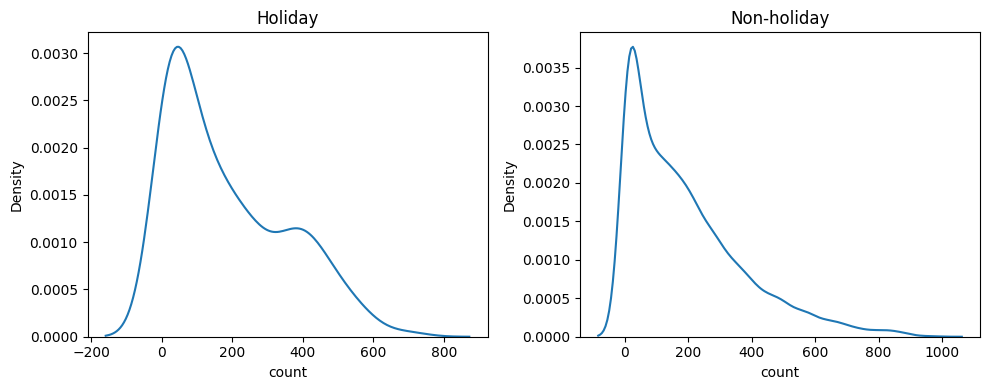

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(holidays)
plt.title('Holiday')

plt.subplot(1,2,2)
sns.kdeplot(non_holidays)
plt.title('Non-holiday')

plt.tight_layout()
plt.show()

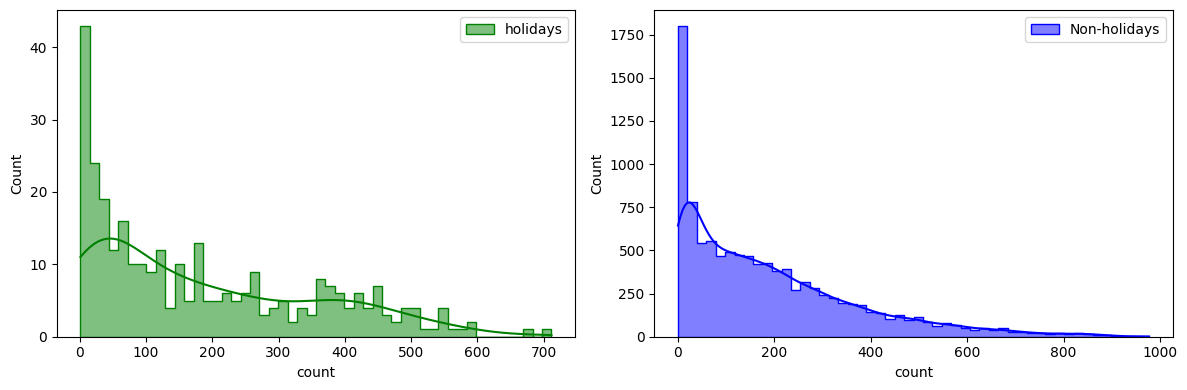

In [56]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.histplot(holidays , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'holidays')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(non_holidays , bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'Non-holidays')
plt.legend()

plt.tight_layout()
plt.show()

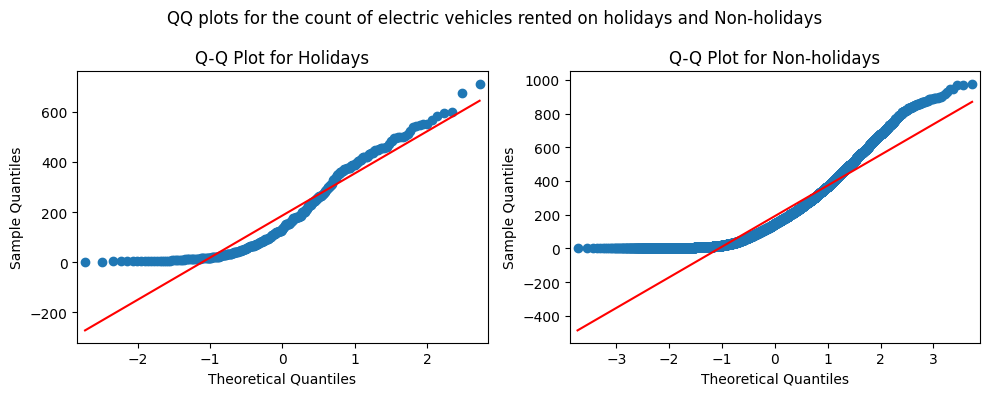

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("QQ plots for the count of electric vehicles rented on holidays and Non-holidays")

# Q-Q plot for working_day
sm.qqplot(holidays, line='s', ax=ax[0])
ax[0].set_title('Q-Q Plot for Holidays')

# Q-Q plot for not_working_day
sm.qqplot(non_holidays, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot for Non-holidays')

plt.tight_layout()
plt.show()

- KDE plots and QQ plots evidently proves that the data is not normally distributed, the quantiles on both axis are not aligned.

##### Shapiro-Wilk test to check for Normality:

In [58]:
stat, p = shapiro(holidays)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.893, p=0.000
Probably not Gaussian


In [59]:
stat, p = shapiro(non_holidays)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.877, p=0.000
Probably not Gaussian


- So, from the above plots it is statistically proved that the data is not norally distributed.

#### Checking if both the datasets have same variance using Levene's test

In [60]:
# Performing Levene's test
stat, p_value = stats.levene(holidays, non_holidays)

print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Levene's test statistic: 1.222306875221986e-06
p-value: 0.9991178954732041
The variances are not significantly different.


- With the help of Levene's test it is statistically proved that both has similar variances.

- From the above tests it is found that both the holidays and non-holiday data is not normally distributed but has similar variances.
- We cannot perform T-test as the criteria is not met.
- But, we are instructed to go ahead with the test(just this business case) even if the assumptions are met.

In [61]:
# Performing the two-sample t-test
t_stat, p_value = stats.ttest_ind(holidays, non_holidays)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The means are significantly different.")
else:
    print("The means are not significantly different.")

t-statistic: -0.5626388963477119
p-value: 0.5736923883271103
The means are not significantly different.


- The above t-test statistically proves that mean of bookings on both holidays and non-holidays is similar.

## Feature - Season & Bookings

##### Let's update the season feature to make it more understandable.

In [62]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [63]:
df.groupby('season')['count'].sum()

season
spring    312498
summer    588282
fall      640662
winter    544034
Name: count, dtype: int64

In [64]:
df_season= np.round(df['season'].value_counts(normalize=True)*100,2).to_frame()
df_season.reset_index(inplace=True)

In [65]:
df_season

,season,proportion
0,winter,25.11
1,summer,25.11
2,fall,25.11
3,spring,24.67


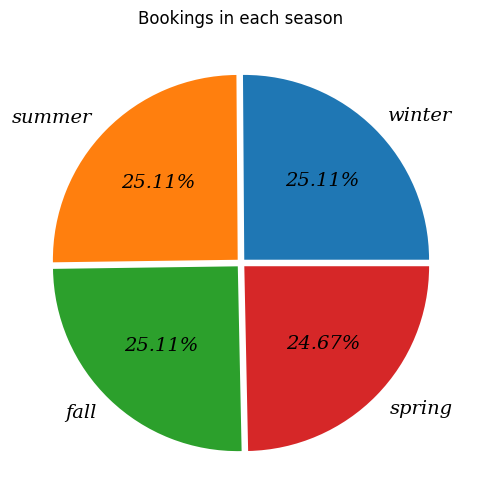

In [66]:
plt.figure(figsize=(6,6))
plt.title('Bookings in each season')
plt.pie(x=df_season['proportion'],explode = [0.025, 0.025, 0.025, 0.025], labels = df_season['season'],autopct = '%.2f%%',
        textprops = {'fontsize' : 14,'fontstyle' : 'oblique','fontfamily' : 'serif','fontweight' : 500})
plt.show()

In [67]:
df.groupby('season')['count'].mean()

season
spring    116.343261
summer    215.251372
fall      234.417124
winter    198.988296
Name: count, dtype: float64

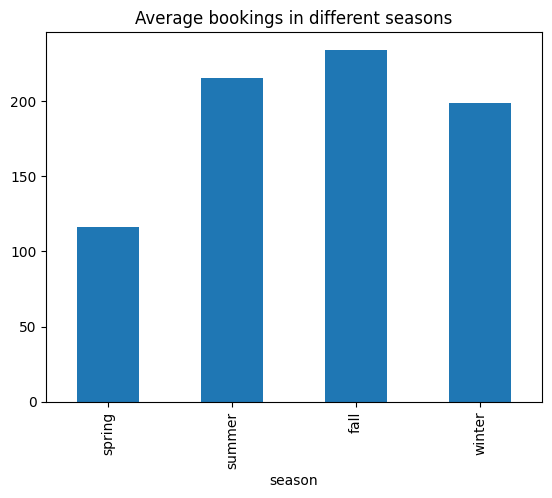

In [68]:
df.groupby('season')['count'].mean().plot(kind='bar')
plt.title('Average bookings in different seasons')
plt.show()

- The hourly count of total rental bikes peaks during the fall season, followed by the summer and winter seasons, while it tends to be lower during the spring season.

In [69]:
spring= df.loc[df["season"]=="spring"]["count"]
summer= df.loc[df["season"]=="summer"]["count"]
fall= df.loc[df["season"]=="fall"]["count"]
winter= df.loc[df["season"]=="winter"]["count"]

### Is the number of cycles rented is similar or different in all four seasons?

- Null Hypothesis ( H0 ) - No. of cycles rented is same for all four seasons.
- Alternate Hypothesis ( HA ) - No. of cycles rented is different for all four seasons.
- Significance level (Alpha) - 0.05
- Test - ANOVA (Analysis of Variances)

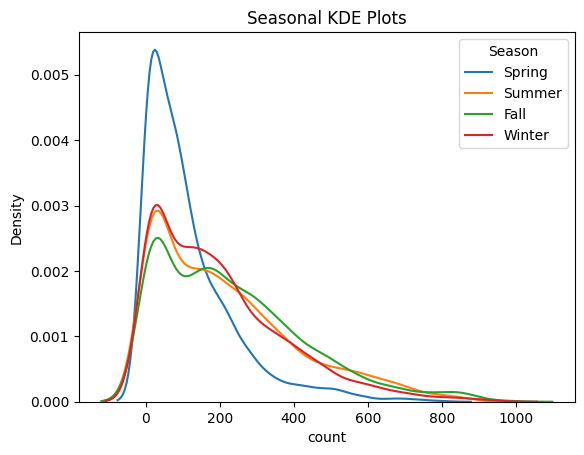

In [70]:
sns.kdeplot(spring, label='Spring')
sns.kdeplot(summer, label='Summer')
sns.kdeplot(fall, label='Fall')
sns.kdeplot(winter, label='Winter')

plt.legend(title='Season')

plt.title('Seasonal KDE Plots')

plt.show()

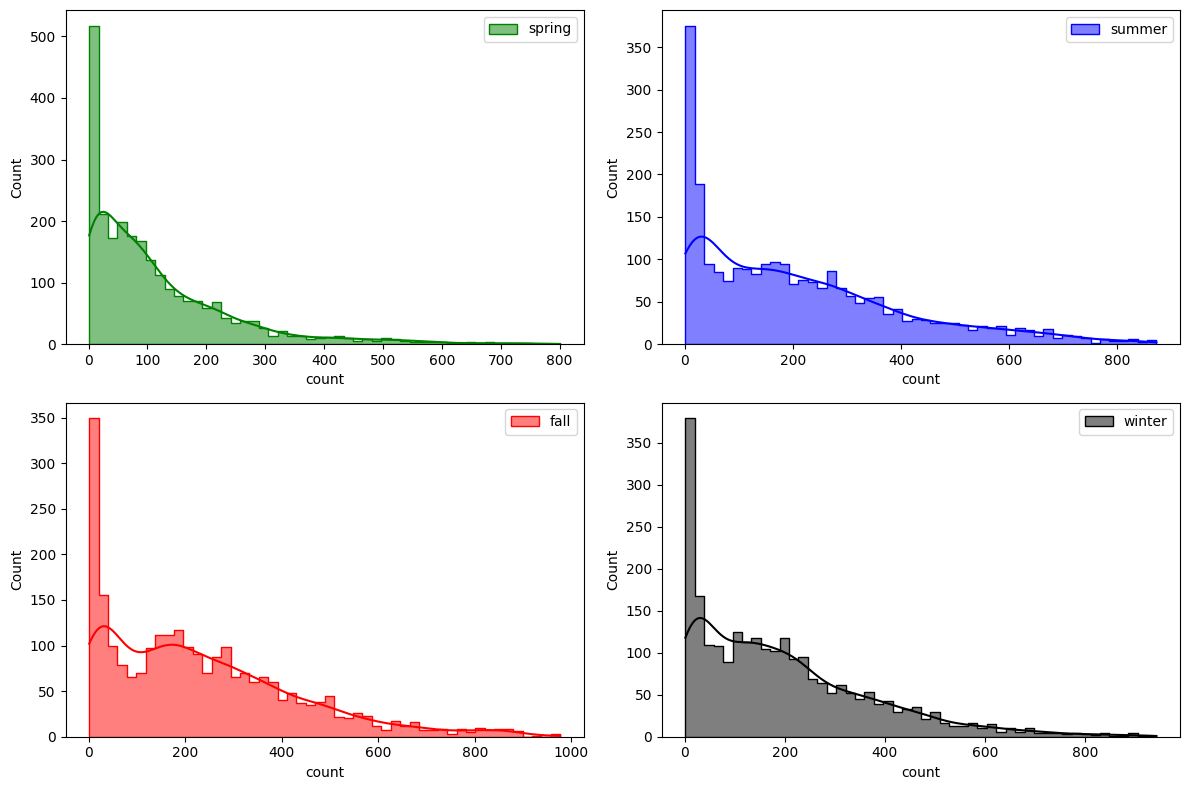

In [71]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
sns.histplot(spring.sample(2500) , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'spring')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(summer.sample(2500) , bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'summer')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(fall.sample(2500) , bins = 50,
             element = 'step', color = 'red', kde = True, label = 'fall')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(winter.sample(2500) , bins = 50,
             element = 'step', color = 'black', kde = True, label = 'winter')
plt.legend()

plt.tight_layout()
plt.show()

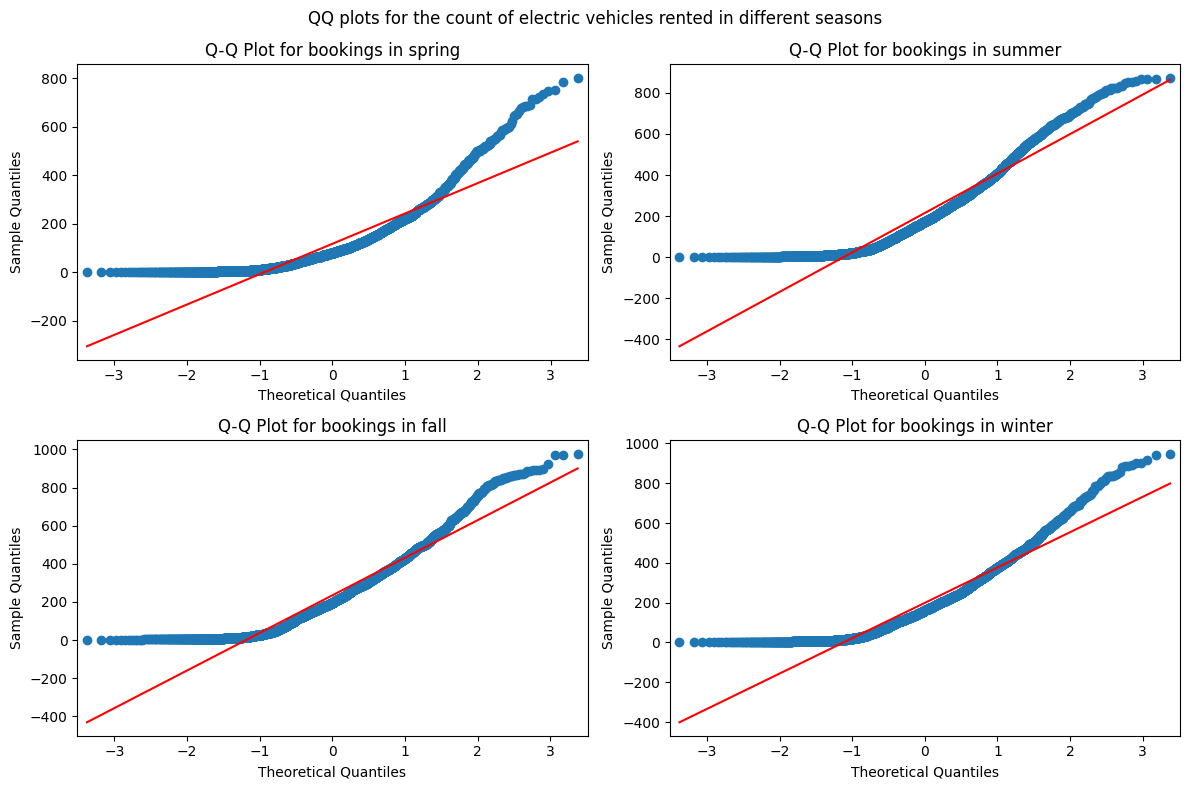

In [72]:
fig,ax = plt.subplots(2, 2,figsize=(12, 8))
plt.suptitle("QQ plots for the count of electric vehicles rented in different seasons")

# Q-Q plot for working_day
sm.qqplot(spring, line='s', ax=ax[0,0])
ax[0,0].set_title('Q-Q Plot for bookings in spring')

# Q-Q plot for not_working_day
sm.qqplot(summer, line='s', ax=ax[0,1])
ax[0,1].set_title('Q-Q Plot for bookings in summer')

sm.qqplot(fall, line='s', ax=ax[1,0])
ax[1,0].set_title('Q-Q Plot for bookings in fall')

sm.qqplot(winter, line='s', ax=ax[1,1])
ax[1,1].set_title('Q-Q Plot for bookings in winter')

plt.tight_layout()
plt.show()

- The above KDE plots and Q-Q plot evidently proves that the data is not normally distributed, the quantiles on both axis are not aligned.

##### Let's conduct a Shapiro-Wilk Test to check for normality

In [73]:
seasons = {
    "Spring": spring,
    "Summer": summer,
    "Fall": fall,
    "Winter": winter
}

# Performing Shapiro-Wilk test for each season
for season, data in seasons.items():
    stat, p = stats.shapiro(data)
    print(f'Shapiro-Wilk Test for {season}: stat={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print(f'{season}: Probably Gaussian')
    else:
        print(f'{season}: Probably not Gaussian')

Shapiro-Wilk Test for Spring: stat=0.809, p=0.000
Spring: Probably not Gaussian
Shapiro-Wilk Test for Summer: stat=0.900, p=0.000
Summer: Probably not Gaussian
Shapiro-Wilk Test for Fall: stat=0.915, p=0.000
Fall: Probably not Gaussian
Shapiro-Wilk Test for Winter: stat=0.895, p=0.000
Winter: Probably not Gaussian


- So, the above Shapiro tests statistically proved that data of all seasons are not normally distributed.

#### Checking if the datasets have same variance using Levene's test

In [74]:
# Performing Levene's test for all four seasons
stat, p_value = stats.levene(spring, summer, fall, winter)

print(f"Levene's Test for all four seasons:")
print(f"Statistic: {stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Levene's Test for all four seasons:
Statistic: 187.771, p-value: 0.000
The variances are significantly different.


- The Levene's test statistically proves that variances in the data of all seasons are significantly different.

- From the above statistical tests its proved that the data is not normal, doesnt have same variances as each other. But, we are going ahead with the ANOVA test as instructed.

#### ANOVA test

In [75]:
from scipy.stats import f_oneway

In [76]:
stat, p = f_oneway(spring, summer, fall, winter)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Fail to reject the null hypothesis: No.of cycles rented is the same across different seasons.')
else:
    print('Reject the null hypothesis: No.of cycles rented is different across at least one of the seasons.')

stat=236.947, p=0.000
Reject the null hypothesis: No.of cycles rented is different across at least one of the seasons.


- The above ANOVA test statistically proves that the no.of cycles rented is different across at least one of the seasons.

## Feature: Weather & Bookings

Let's understand what different values in weather feature mean.
- 1: Clear, Few clouds, partly cloudy, partly cloudy 
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
- 3: Light Snow, Light Rain - Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [77]:
df.groupby('weather')['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [78]:
df.groupby('weather')['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

In [79]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


- Weather 1 is the most favorable condition for electric cycle bookings, with the highest total and average bookings.
- Weather 2 is also a favorable condition, but with lower total and average bookings compared to Weather 1.
- Weather 3 is less favorable for bookings, as shown by both the total and mean values.
- Weather 4 is the least favorable weather condition for electric cycle bookings, indicated by the extremely low total bookings.

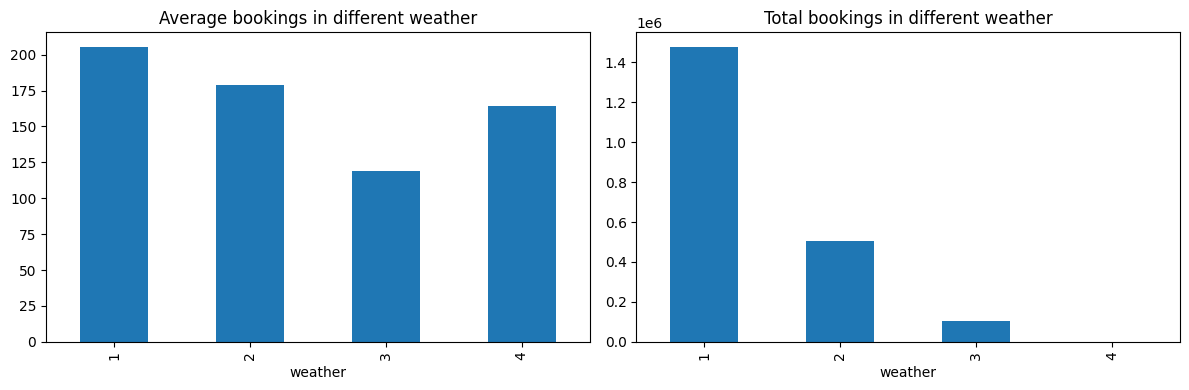

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df.groupby('weather')['count'].mean().plot(kind='bar')
plt.title('Average bookings in different weather')

plt.subplot(1,2,2)
df.groupby('weather')['count'].sum().plot(kind='bar')
plt.title('Total bookings in different weather')

plt.tight_layout()
plt.show()

- This data suggests that electric cycle bookings are heavily influenced by weather conditions, with certain weather (presumably fair or favorable weather represented by Weather 1 and 2) leading to significantly higher usage, while less favorable weather conditions (represented by Weather 3 and 4) result in fewer bookings.

### Is the number of cycles rented is similar or different across all types of weather?

- Null Hypothesis ( H0 ) - No. of cycles rented is same for all four seasons.
- Alternate Hypothesis ( HA ) - No. of cycles rented is different for all four seasons.
- Significance level (Alpha) - 0.05
- Test - ANOVA (Analysis of Variances)

In [81]:
clear= df.loc[df['weather']==1]['count']
mist= df.loc[df['weather']==2]['count']
light_snow_rain= df.loc[df['weather']==3]['count']
heavy_rain= df.loc[df['weather']==4]['count']

- As there is only a single value under heavy_rain, we cannot check the variance and distribution of heavy rain data.

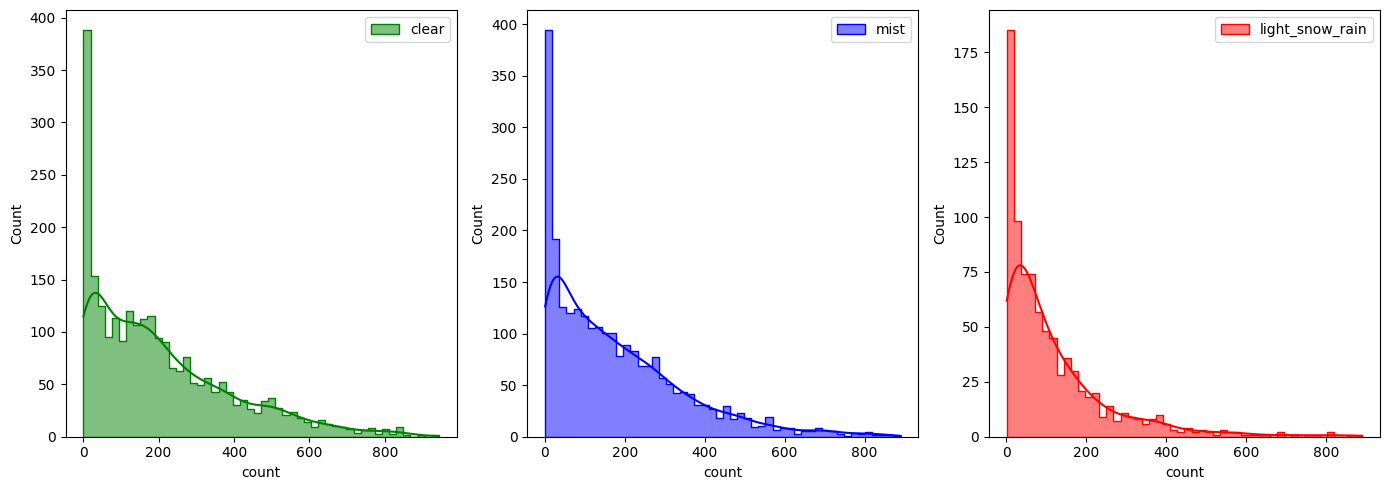

In [82]:
plt.figure(figsize = (14, 5))
plt.subplot(1, 3, 1)
sns.histplot(clear.sample(2500) , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'clear')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(mist.sample(2500) , bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'mist')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(light_snow_rain , bins = 50,
             element = 'step', color = 'red', kde = True, label = 'light_snow_rain')
plt.legend()

plt.tight_layout()
plt.show()

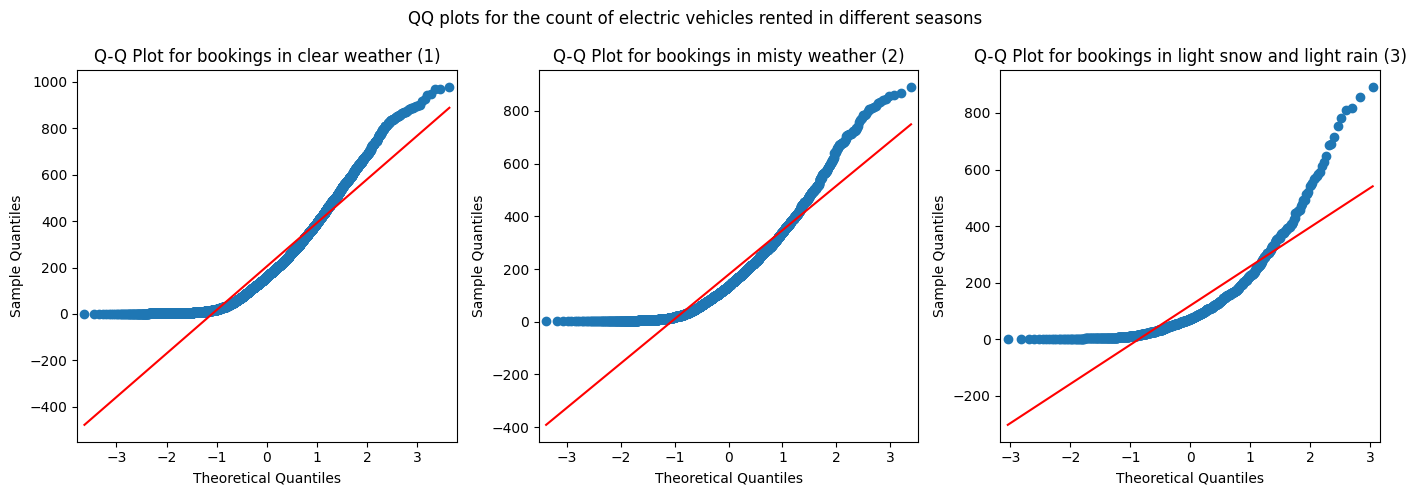

In [83]:
fig,ax = plt.subplots(1, 3,figsize=(14, 5))
plt.suptitle("QQ plots for the count of electric vehicles rented in different seasons")

# Q-Q plot for clear weather (1)
sm.qqplot(clear, line='s', ax=ax[0])
ax[0].set_title('Q-Q Plot for bookings in clear weather (1)')

# Q-Q plot for misty weather (2)
sm.qqplot(mist, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot for bookings in misty weather (2)')

# Q-Q plot for light snow and light rain (3)
sm.qqplot(light_snow_rain, line='s', ax=ax[2])
ax[2].set_title('Q-Q Plot for bookings in light snow and light rain (3)')

plt.tight_layout()
plt.show()

##### Let's conduct a Shapiro-Wilk Test to check for normality

In [84]:
weather_conditions = {
    "Clear": clear,
    "Mist": mist,
    "Light Snow/Rain": light_snow_rain
}

# Performing Shapiro-Wilk test for each weather condition
for condition, data in weather_conditions.items():
    stat, p = stats.shapiro(data)
    print(f'Shapiro-Wilk Test for {condition}: stat={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print(f'{condition}: Probably Gaussian')
    else:
        print(f'{condition}: Probably not Gaussian')

Shapiro-Wilk Test for Clear: stat=0.891, p=0.000
Clear: Probably not Gaussian
Shapiro-Wilk Test for Mist: stat=0.877, p=0.000
Mist: Probably not Gaussian
Shapiro-Wilk Test for Light Snow/Rain: stat=0.767, p=0.000
Light Snow/Rain: Probably not Gaussian


- So, the above Shapiro tests statistically proved that data of all weathers are not normally distributed.

#### Checking if the datasets have same variance using Levene's test

In [85]:
# Performing Levene's test for all four seasons
stat, p_value = stats.levene(clear, mist, light_snow_rain,heavy_rain)

print(f"Levene's Test for all four seasons:")
print(f"Statistic: {stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Levene's Test for all four seasons:
Statistic: 54.851, p-value: 0.000
The variances are significantly different.


- The Levene's test statistically proves that variances in the data of all weathers are significantly different.
- From the above statistical tests its proved that the data is not normal, doesnt have same variances as each other. But, we are going ahead with the ANOVA test as instructed.

#### ANOVA test

In [86]:
stat, p = f_oneway(clear, mist, light_snow_rain, heavy_rain)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Fail to reject the null hypothesis: No.of cycles rented is the same across different weather.')
else:
    print('Reject the null hypothesis: No.of cycles rented is different across at least one type of the weather.')

stat=65.530, p=0.000
Reject the null hypothesis: No.of cycles rented is different across at least one type of the weather.


- The above ANOVA test statistically proves that the no.of cycles rented is different across at least one type of the weather.

## Is Weather dependent on season?

- Both weather and season are categorical features.

- Null Hypothesis ( H0 ) - Weather is independent of season.
- Alternate Hypothesis ( HA ) - Weather is dependent on season.
- Significance level (Alpha) - 0.05
- Test - Chi-square test

In [87]:
import scipy.stats as stats

In [88]:
# Creating a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])
contingency_table

season,spring,summer,fall,winter
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [89]:
chi_test_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('dof =', dof)

if p > 0.05:
    print("Fail to reject the null hypothesis: Weather is independent of season.")
else:
    print("Reject the null hypothesis: Weather is dependent on season.")

Test Statistic = 49.15865559689363
p value = 1.5499250736864862e-07
dof = 9
Reject the null hypothesis: Weather is dependent on season.


- It's statistically proved that weather is dependent on season.

## Recommendations:

- Consider implementing time-based pricing where prices are lower during dull hours and higher during peak hours. This can encourage customers to rent bikes during off-peak hours.
- By leveraging the hourly fluctuation in bike rental counts throughout the day, bikes can be recharged during off-peak hours and made ready for customers. This ensures that bikes are not low on battery when needed.
- Conduct thorough maintenance checks on the bike fleet before peak seasons to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.
- Consider offering amenities and add-ons, such as rain jackets or water bottles in the summer, to enhance customer comfort and convenience. These thoughtful additions can greatly enhance the customer experience and foster repeat business.
- Given the evident seasonal trends in bike rental counts, Yulu can tailor its marketing strategies accordingly. Emphasize promoting bike rentals during spring and summer months when demand peaks, introducing seasonal discounts or exclusive packages to attract more customers during these periods.
- Given that around 81% of users are registered, and the remaining 19% are casual, create marketing strategies to attract more new customers.
- Calculate churn rate to find whether the registered users are using our services are not.
- Analyze the demand patterns for different months, seasons and optimize the inventory to be ready.
- Collect more information regarding the bikes(customer feedbacks) to help find the areas of improvement and also find their preferences to better user experiences.